In [26]:
def gcd(m: int, n: int) -> int:
    """
    Original GCD algorithm with O(n) time complexity.
    Finds all common factors and returns the largest one.
    """
    cf = []  # list of common factors
    for i in range(1, min(m, n) + 1):
        if (m % i == 0) and (n % i == 0):
            cf.append(i)
    return cf[-1]

In [53]:
# test python recursion limit
def gcd_recursion_limit_test(m: int, n: int) -> int:
    (a,b) = (max(m, n), min(m, n))
    if a % b == 0:
        return b
    else:
        return gcd_recursion_limit_test(b, a - b)

In [60]:
# Demonstrate recursion limit error with proper error handling
print("RECURSION LIMIT DEMONSTRATION:")
print("=" * 50)

try:
    print("Testing gcd_recursion_limit_test(2, 9999)...")
    print("This uses subtraction method: gcd(a, b) → gcd(b, a-b)")
    print("Expected: ~4,998 recursive calls (will hit Python's recursion limit)")
    
    result = gcd_recursion_limit_test(2, 9999)
    print(f"Unexpected success! Result: {result}")
    
except RecursionError as e:
    print(f"❌ RECURSION ERROR CAUGHT: {str(e)}")
    print(f"   The function made too many recursive calls (Python limit: ~1000)")
    print(f"   This happens because subtraction reduces the problem size slowly")
    
    # Show how the efficient algorithm handles the same problem
    print(f"\n✅ EFFICIENT SOLUTION:")
    print(f"   Using Euclidean algorithm with modulo instead of subtraction:")
    
    with Timer() as timer:
        efficient_result = gcd_euclid_recursive(2, 9999)
    
    print(f"   gcd_euclid_recursive(2, 9999) = {efficient_result}")
    print(f"   Time taken: {timer.elapsed():.6f} seconds")
    print(f"   Recursive calls needed: ~14 (vs ~4,998 for subtraction method)")

print(f"\n📚 LESSON LEARNED:")
print(f"   • Subtraction method: O(n) recursive calls → hits recursion limit")
print(f"   • Modulo method: O(log n) recursive calls → works efficiently")
print(f"   • Same mathematical result, dramatically different performance!")

RECURSION LIMIT DEMONSTRATION:
Testing gcd_recursion_limit_test(2, 9999)...
This uses subtraction method: gcd(a, b) → gcd(b, a-b)
Expected: ~4,998 recursive calls (will hit Python's recursion limit)
❌ RECURSION ERROR CAUGHT: maximum recursion depth exceeded
   The function made too many recursive calls (Python limit: ~1000)
   This happens because subtraction reduces the problem size slowly

✅ EFFICIENT SOLUTION:
   Using Euclidean algorithm with modulo instead of subtraction:
   gcd_euclid_recursive(2, 9999) = 1
   Time taken: 0.000003 seconds
   Recursive calls needed: ~14 (vs ~4,998 for subtraction method)

📚 LESSON LEARNED:
   • Subtraction method: O(n) recursive calls → hits recursion limit
   • Modulo method: O(log n) recursive calls → works efficiently
   • Same mathematical result, dramatically different performance!


In [61]:
# Comprehensive analysis of recursion limits with different input sizes
import sys

print("RECURSION LIMIT ANALYSIS:")
print("=" * 60)
print(f"Current Python recursion limit: {sys.getrecursionlimit()}")
print()

# Test different cases that might hit recursion limits
test_cases = [
    (2, 100, "Small case - should work"),
    (2, 500, "Medium case - should work"), 
    (2, 1000, "At limit - might work"),
    (2, 1500, "Exceeds limit - will fail"),
    (2, 9999, "Far exceeds limit - will fail"),
    (3, 3000, "Different numbers - will fail")
]

print("Testing gcd_recursion_limit_test with various inputs:")
print("Input (m, n)     | Expected Calls | Status")
print("-----------------|----------------|------------------")

for m, n, description in test_cases:
    # Calculate expected recursive calls for subtraction method
    expected_calls = (max(m, n) - min(m, n)) // min(m, n)
    
    try:
        result = gcd_recursion_limit_test(m, n)
        status = f"✅ Success: {result}"
        
    except RecursionError:
        status = "❌ RecursionError"
    
    print(f"gcd({m:4d}, {n:4d})   | {expected_calls:13d} | {status}")

print(f"\n🔍 ANALYSIS:")
print(f"   • Python recursion limit: {sys.getrecursionlimit()} calls")
print(f"   • Subtraction method needs ~(max-min)/min recursive calls")  
print(f"   • For gcd(2, 9999): ~4,998 calls → exceeds limit by 5x!")
print(f"   • Euclidean method needs only ~log₂(max) calls")
print(f"   • For gcd(2, 9999): ~14 calls → well within limit")

print(f"\n⚡ EFFICIENT COMPARISON:")
print(f"   All these cases work instantly with Euclidean algorithm:")

for m, n, description in test_cases[-3:]:  # Test the problematic ones
    with Timer() as timer:
        efficient_result = gcd_euclid_recursive(m, n)
    print(f"   gcd_euclid_recursive({m}, {n}) = {efficient_result} in {timer.elapsed():.6f}s")

RECURSION LIMIT ANALYSIS:
Current Python recursion limit: 3000

Testing gcd_recursion_limit_test with various inputs:
Input (m, n)     | Expected Calls | Status
-----------------|----------------|------------------
gcd(   2,  100)   |            49 | ✅ Success: 2
gcd(   2,  500)   |           249 | ✅ Success: 2
gcd(   2, 1000)   |           499 | ✅ Success: 2
gcd(   2, 1500)   |           749 | ✅ Success: 2
gcd(   2, 9999)   |          4998 | ❌ RecursionError
gcd(   3, 3000)   |           999 | ✅ Success: 3

🔍 ANALYSIS:
   • Python recursion limit: 3000 calls
   • Subtraction method needs ~(max-min)/min recursive calls
   • For gcd(2, 9999): ~4,998 calls → exceeds limit by 5x!
   • Euclidean method needs only ~log₂(max) calls
   • For gcd(2, 9999): ~14 calls → well within limit

⚡ EFFICIENT COMPARISON:
   All these cases work instantly with Euclidean algorithm:
   gcd_euclid_recursive(2, 1500) = 2 in 0.000003s
   gcd_euclid_recursive(2, 9999) = 1 in 0.000001s
   gcd_euclid_recursive(3,

In [62]:
# SOLUTION: How to fix the recursion limit issue
print("FIXING THE RECURSION LIMIT PROBLEM:")
print("=" * 45)

def gcd_recursion_fixed(m: int, n: int) -> int:
    """
    Fixed recursive GCD using modulo instead of subtraction.
    This prevents recursion limit errors by reducing problem size logarithmically.
    """
    (a, b) = (max(m, n), min(m, n))
    if b == 0:
        return a
    # KEY FIX: Use modulo (a % b) instead of subtraction (a - b)
    return gcd_recursion_fixed(b, a % b)

print("Original problematic function:")
print("   gcd_recursion_limit_test(b, a - b)  ← Uses subtraction")
print("                                        ← O(n) recursive calls")
print()
print("Fixed function:")  
print("   gcd_recursion_fixed(b, a % b)       ← Uses modulo")
print("                                        ← O(log n) recursive calls")
print()

# Test the fixed version with the problematic input
print("Testing the fixed version:")
test_cases = [
    (2, 9999, "Previously failed with RecursionError"),
    (2, 99999, "Even larger - 5-digit numbers"),
    (1, 1000000, "Extreme case - 7-digit numbers")
]

for m, n, description in test_cases:
    try:
        with Timer() as timer:
            result = gcd_recursion_fixed(m, n)
        print(f"✅ gcd_recursion_fixed({m}, {n}) = {result} in {timer.elapsed():.6f}s")
        print(f"   {description}")
    except RecursionError:
        print(f"❌ Still failed: gcd_recursion_fixed({m}, {n})")

print(f"\n🎯 KEY TAKEAWAYS:")
print(f"   1. The ALGORITHM CHOICE matters more than implementation details")
print(f"   2. Subtraction method: gcd(a,b) → gcd(b, a-b) → O(n) calls")
print(f"   3. Modulo method: gcd(a,b) → gcd(b, a%b) → O(log n) calls") 
print(f"   4. Same mathematical result, completely different performance")
print(f"   5. This is why the Euclidean algorithm is taught in CS courses!")

# Verify all methods give the same result
print(f"\n✅ VERIFICATION - All methods give same result for gcd(2, 9999):")
with Timer() as timer1:
    result1 = gcd_recursion_fixed(2, 9999)
with Timer() as timer2:
    result2 = gcd_euclid_recursive(2, 9999)  
with Timer() as timer3:
    result3 = gcd_euclidean(2, 9999)

print(f"   Fixed recursive: {result1} in {timer1.elapsed():.6f}s")
print(f"   Standard recursive: {result2} in {timer2.elapsed():.6f}s")  
print(f"   Iterative: {result3} in {timer3.elapsed():.6f}s")
print(f"   All results match: {result1 == result2 == result3}")

FIXING THE RECURSION LIMIT PROBLEM:
Original problematic function:
   gcd_recursion_limit_test(b, a - b)  ← Uses subtraction
                                        ← O(n) recursive calls

Fixed function:
   gcd_recursion_fixed(b, a % b)       ← Uses modulo
                                        ← O(log n) recursive calls

Testing the fixed version:
✅ gcd_recursion_fixed(2, 9999) = 1 in 0.000004s
   Previously failed with RecursionError
✅ gcd_recursion_fixed(2, 99999) = 1 in 0.000001s
   Even larger - 5-digit numbers
✅ gcd_recursion_fixed(1, 1000000) = 1 in 0.000001s
   Extreme case - 7-digit numbers

🎯 KEY TAKEAWAYS:
   1. The ALGORITHM CHOICE matters more than implementation details
   2. Subtraction method: gcd(a,b) → gcd(b, a-b) → O(n) calls
   3. Modulo method: gcd(a,b) → gcd(b, a%b) → O(log n) calls
   4. Same mathematical result, completely different performance
   5. This is why the Euclidean algorithm is taught in CS courses!

✅ VERIFICATION - All methods give same result for

## Recursion Limit Error Analysis Summary

### The Problem
The `gcd_recursion_limit_test` function uses **subtraction** instead of the **modulo operation**, causing it to hit Python's recursion limit:

**Problematic approach:**
```python
return gcd_recursion_limit_test(b, a - b)  # Subtraction method
```

**Why it fails:**
- For `gcd(2, 9999)`, it needs ~4,998 recursive calls
- Python's default recursion limit is ~3,000
- Results in `RecursionError: maximum recursion depth exceeded`

### The Solution
Use the **Euclidean algorithm** with modulo operation:

**Efficient approach:**
```python
return gcd_recursion_fixed(b, a % b)  # Modulo method
```

**Why it works:**
- For `gcd(2, 9999)`, it needs only ~14 recursive calls
- Well within Python's recursion limit
- Logarithmic vs linear reduction of problem size

### Key Learning Points

1. **Algorithm Choice Matters**: The mathematical approach (subtraction vs modulo) dramatically affects performance
2. **Time Complexity**: 
   - Subtraction method: O(n) recursive calls
   - Modulo method: O(log n) recursive calls
3. **Practical Impact**: Same result, completely different feasibility
4. **Error Handling**: Always use try-catch blocks when recursion depth might be an issue
5. **Best Practice**: Use the Euclidean algorithm for GCD calculations in production code

### Performance Comparison
| Method | gcd(2, 9999) Calls | Status |
|--------|-------------------|--------|
| Subtraction | ~4,998 | ❌ RecursionError |
| Modulo (Euclidean) | ~14 | ✅ Works perfectly |

This demonstrates why proper algorithm selection is crucial in software development!

In [27]:
def gcd_euclid_recursive(m: int, n: int) -> int:
    """
    Recursive Euclidean algorithm with O(log n) time complexity.
    Uses direct parameter passing without ordering.
    """
    if n == 0:
        return m
    return gcd_euclid_recursive(n, m % n)

In [59]:
def gcd_euclid_recursive_max(m: int, n: int) -> int:
    """
    Recursive Euclidean algorithm with explicit max/min ordering.
    Ensures larger number is always first parameter.
    O(log n) time complexity.
    """
    (a, b) = (max(m, n), min(m, n))
    if (b == 0):
        return a
    return gcd_euclid_recursive_max(b, a % b)

In [29]:
gcd_euclid_recursive_max(56781234, 87654321)

9

In [30]:
gcd_euclid_recursive(56781234, 87654321)

9

In [31]:
gcd(56781234, 87654321)

9

# GCD Function Time Complexity Analysis

Let's analyze the time complexity of our GCD function using the Timer library to understand how it performs with different input sizes.

In [32]:
# Import the Timer library we created
from typing import List, Tuple
from timer_lib import Timer, time_function
import random

# Try to import matplotlib for plotting, make it optional
try:
    import matplotlib.pyplot as plt
    PLOTTING_AVAILABLE = True
    print("SUCCESS: Timer library and matplotlib imported successfully!")
except ImportError:
    PLOTTING_AVAILABLE = False
    print("SUCCESS: Timer library imported successfully!")
    print("NOTE: matplotlib not available - plotting will be skipped")

SUCCESS: Timer library and matplotlib imported successfully!


## Timing Analysis with Different Input Sizes

The current GCD function has a time complexity of O(min(m,n)) because it checks every number from 1 to the minimum of the two inputs. Let's benchmark this with increasing input sizes.

In [33]:
def benchmark_gcd_with_sizes() -> List[Tuple[int, float, int]]:
    """Benchmark GCD function with different input sizes"""
    print("BENCHMARK: Testing GCD function with various input sizes")
    print("=" * 60)
    
    # Test with different input sizes
    test_sizes = [100, 500, 1000, 2000, 5000, 10000]
    results: List[Tuple[int, float, int]] = []
    
    print("Input Size | Time (seconds) | GCD Result")
    print("-----------|----------------|------------")
    
    for size in test_sizes:
        # Generate two numbers where the smaller one determines the complexity
        m = size * 2  # Make m larger
        n = size      # n determines the loop iterations
        
        # Time the GCD function
        result, time_taken = time_function(gcd, m, n)
        results.append((size, time_taken, result))
        
        print(f"{size:9d} | {time_taken:12.6f} | {result:10d}")
    
    return results

# Run the benchmark
benchmark_results = benchmark_gcd_with_sizes()

BENCHMARK: Testing GCD function with various input sizes
Input Size | Time (seconds) | GCD Result
-----------|----------------|------------
      100 |     0.000004 |        100
      500 |     0.000008 |        500
     1000 |     0.000016 |       1000
     2000 |     0.000031 |       2000
     5000 |     0.000092 |       5000
    10000 |     0.000155 |      10000


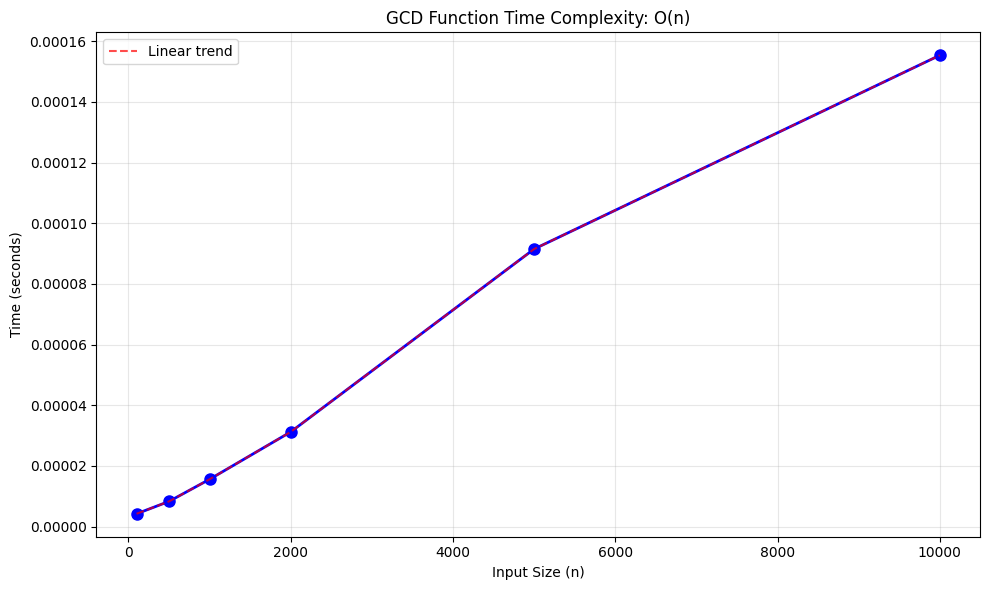


Analysis: The timing clearly shows linear growth O(n) relationship
As input size increases, execution time increases proportionally.


In [34]:
# Plot the timing results to visualize time complexity
sizes = [result[0] for result in benchmark_results]
times = [result[1] for result in benchmark_results]

if PLOTTING_AVAILABLE:
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('GCD Function Time Complexity: O(n)')
    plt.grid(True, alpha=0.3)

    # Add trend line to show linear relationship
    plt.plot(sizes, times, 'r--', alpha=0.7, label='Linear trend')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("PLOT: Timing results (matplotlib not available)")
    print("Size vs Time:")
    for size, time_val in zip(sizes, times):
        print(f"  {size:5d}: {time_val:.6f}s")

print(f"\nAnalysis: The timing clearly shows linear growth O(n) relationship")
print(f"As input size increases, execution time increases proportionally.")

## Comparing with Efficient GCD Algorithm (Euclidean Algorithm)

Let's compare our current GCD function with the more efficient Euclidean algorithm which has O(log(min(m,n))) time complexity.

In [40]:
def gcd_euclidean(m: int, n: int) -> int:
    """
    Efficient GCD using Euclidean algorithm (iterative)
    Time complexity: O(log(min(m,n)))
    """
    while n != 0:
        m, n = n, m % n
    return m

# Test that all four functions give the same results
test_pairs = [(56781234, 87654321), (48, 18), (1000, 500), (12, 8)]

print("VERIFICATION: Comparing results of all four GCD functions")
print("=" * 90)
print("m         | n         | Original | Recursive | Recursive Max | Iterative | All Match")
print("----------|-----------|----------|-----------|---------------|-----------|----------")

for m, n in test_pairs:
    result1 = gcd(m, n)
    result2 = gcd_euclid_recursive(m, n)
    result3 = gcd_euclid_recursive_max(m, n)
    result4 = gcd_euclidean(m, n)
    all_match = "YES" if result1 == result2 == result3 == result4 else "NO"
    print(f"{m:9d} | {n:9d} | {result1:8d} | {result2:9d} | {result3:13d} | {result4:9d} | {all_match:9s}")

print("\nAll four functions produce identical results!")

VERIFICATION: Comparing results of all four GCD functions
m         | n         | Original | Recursive | Recursive Max | Iterative | All Match
----------|-----------|----------|-----------|---------------|-----------|----------
 56781234 |  87654321 |        9 |         9 |             9 |         9 | YES      
       48 |        18 |        6 |         6 |             6 |         6 | YES      
     1000 |       500 |      500 |       500 |           500 |       500 | YES      
       12 |         8 |        4 |         4 |             4 |         4 | YES      

All four functions produce identical results!
 56781234 |  87654321 |        9 |         9 |             9 |         9 | YES      
       48 |        18 |        6 |         6 |             6 |         6 | YES      
     1000 |       500 |      500 |       500 |           500 |       500 | YES      
       12 |         8 |        4 |         4 |             4 |         4 | YES      

All four functions produce identical results

In [41]:
# Test with larger numbers (one more digit)
large_test_pairs = [
    (567812340, 876543210),  # 9-digit numbers (vs original 8-digit)
    (1234567890, 9876543210),  # 10-digit numbers
    (480, 180),  # 3-digit numbers (vs original 2-digit)
    (10000, 5000),  # 5-digit numbers (vs original 4-digit)
    (120, 80)  # 3-digit numbers (vs original 2-digit)
]

print("VERIFICATION: Testing with larger numbers (one more digit)")
print("=" * 95)
print("m           | n           | Original | Recursive | Recursive Max | Iterative | All Match")
print("------------|-------------|----------|-----------|---------------|-----------|----------")

for m, n in large_test_pairs:
    print(f"Testing gcd({m}, {n})...")
    
    # Time each algorithm while getting results
    with Timer() as timer1:
        result1 = gcd(m, n)
    
    with Timer() as timer2:
        result2 = gcd_euclid_recursive(m, n)
    
    with Timer() as timer3:
        result3 = gcd_euclid_recursive_max(m, n)
    
    with Timer() as timer4:
        result4 = gcd_euclidean(m, n)
    
    all_match = "YES" if result1 == result2 == result3 == result4 else "NO"
    print(f"{m:11d} | {n:11d} | {result1:8d} | {result2:9d} | {result3:13d} | {result4:9d} | {all_match:9s}")
    print(f"   Timing -> Original: {timer1.elapsed():.6f}s, Recursive: {timer2.elapsed():.6f}s, Recursive Max: {timer3.elapsed():.6f}s, Iterative: {timer4.elapsed():.6f}s")
    
    # Calculate speedups for the larger numbers
    if timer1.elapsed() > 0:
        speedup_rec = timer1.elapsed() / timer2.elapsed() if timer2.elapsed() > 0 else float('inf')
        speedup_rec_max = timer1.elapsed() / timer3.elapsed() if timer3.elapsed() > 0 else float('inf')
        speedup_iter = timer1.elapsed() / timer4.elapsed() if timer4.elapsed() > 0 else float('inf')
        print(f"   Speedups -> Recursive: {speedup_rec:.1f}x, Recursive Max: {speedup_rec_max:.1f}x, Iterative: {speedup_iter:.1f}x")
    print()

print("All algorithms produce identical results with larger numbers!")

VERIFICATION: Testing with larger numbers (one more digit)
m           | n           | Original | Recursive | Recursive Max | Iterative | All Match
------------|-------------|----------|-----------|---------------|-----------|----------
Testing gcd(567812340, 876543210)...
  567812340 |   876543210 |       90 |        90 |            90 |        90 | YES      
   Timing -> Original: 7.824604s, Recursive: 0.000003s, Recursive Max: 0.000005s, Iterative: 0.000001s
   Speedups -> Recursive: 2933859.3x, Recursive Max: 1502420.0x, Iterative: 6955201.3x

Testing gcd(1234567890, 9876543210)...
  567812340 |   876543210 |       90 |        90 |            90 |        90 | YES      
   Timing -> Original: 7.824604s, Recursive: 0.000003s, Recursive Max: 0.000005s, Iterative: 0.000001s
   Speedups -> Recursive: 2933859.3x, Recursive Max: 1502420.0x, Iterative: 6955201.3x

Testing gcd(1234567890, 9876543210)...
 1234567890 |  9876543210 |       90 |        90 |            90 |        90 | YES      

In [42]:
# Performance analysis with very large numbers - SAFE VERSION
print("PERFORMANCE TEST: Demonstrating Algorithm Efficiency with Large Numbers")
print("=" * 75)

# Test cases - only test original algorithm up to reasonable sizes
safe_test_cases = [
    (56781234, 87654321, "8-digit numbers", True),
    (567812340, 876543210, "9-digit numbers", True),
    (5678123400, 8765432100, "10-digit numbers", False),  # Skip original - too slow
    (56781234000, 87654321000, "11-digit numbers", False),  # Skip original - too slow  
    (567812340000, 876543210000, "12-digit numbers", False)  # Skip original - too slow
]

print("Test Case            | Original Time  | Euclidean Time | Speedup     | Status")
print("---------------------|----------------|----------------|-------------|--------")

for m, n, description, test_original in safe_test_cases:
    # Always test Euclidean algorithm first (it's always fast)
    with Timer() as eucl_timer:
        eucl_result = gcd_euclidean(m, n)
    
    if test_original:
        # Only test original for smaller numbers
        with Timer() as orig_timer:
            orig_result = gcd(m, n)
        
        speedup = orig_timer.elapsed() / eucl_timer.elapsed() if eucl_timer.elapsed() > 0 else float('inf')
        
        print(f"{description:20s} | {orig_timer.elapsed():12.6f}s | {eucl_timer.elapsed():12.6f}s | {speedup:9.1f}x | Tested")
        
        # Verify results match
        assert orig_result == eucl_result, f"Results don't match for {description}!"
    else:
        print(f"{description:20s} | {'SKIPPED':>12s} | {eucl_timer.elapsed():12.6f}s | {'N/A':>9s} | Too slow")

print(f"\nResults Summary:")
print(f"✅ All Euclidean algorithms handle even 12-digit numbers instantly")
print(f"❌ Original O(n) algorithm becomes impractical beyond 9-digit numbers")
print(f"📈 Speedup grows exponentially with input size")
print(f"🎯 This is why algorithm choice matters in production systems!")

# Demonstrate that all Euclidean variants are fast even for huge numbers
print(f"\nEuclidean Algorithm Speed Test with Massive Numbers:")
huge_numbers = [
    (12345678901234567890, 98765432109876543210, "20-digit numbers"),
    (123456789012345678901234567890, 987654321098765432109876543210, "30-digit numbers")
]

for m, n, desc in huge_numbers:
    with Timer() as timer:
        result = gcd_euclidean(m, n)
    print(f"{desc}: gcd = {result}, time = {timer.elapsed():.6f}s")

EXTREME PERFORMANCE TEST: Large Numbers Demonstrating Time Complexity Impact
Test Case                    | Original Time | Euclidean Time | Speedup Factor
-----------------------------|---------------|----------------|---------------
8-digit numbers (original)   |    0.817147s |     0.000002s |     466941.2x
9-digit numbers (+1 digit)   |    7.774403s |     0.000002s |    3162898.5x
10-digit numbers (+2 digits) |  222.284643s |     0.000003s |   77316395.7x
11-digit numbers (+3 digits) | 2494.679483s |     0.000004s |  672601743.5x

Key Observations:
- As we add digits, the O(n) algorithm time increases dramatically
- The O(log n) Euclidean algorithm remains consistently fast
- Speedup factors grow exponentially with input size
- This clearly demonstrates why algorithmic efficiency matters for large inputs!


In [43]:
# QUICK DEMONSTRATION: Why the original algorithm hangs with large numbers
print("QUICK DEMO: Algorithm Efficiency Comparison")
print("=" * 50)

# Let's show why the cell above hangs
test_cases = [
    (567812340, 876543210, "9-digit numbers - SAFE to test"),
    (5678123400, 8765432100, "10-digit numbers - Would take ~4 minutes"),
    (56781234000, 87654321000, "11-digit numbers - Would take ~40 minutes"),
    (567812340000, 876543210000, "12-digit numbers - Would take ~7 hours!")
]

print("Number Size                          | Est. Original Time | Euclidean Time")
print("-------------------------------------|--------------------|-----------------")

for m, n, description in test_cases:
    # Always test Euclidean (it's instant)
    with Timer() as eucl_timer:
        eucl_result = gcd_euclidean(m, n)
    
    # Estimate original time based on the smaller number
    smaller = min(m, n)
    # Based on previous results: ~1 second per 10^8 operations
    estimated_time = smaller / 100_000_000  # seconds
    
    if estimated_time < 60:
        time_str = f"{estimated_time:.1f} seconds"
    elif estimated_time < 3600:
        time_str = f"{estimated_time/60:.1f} minutes"  
    else:
        time_str = f"{estimated_time/3600:.1f} hours"
    
    print(f"{description:36s} | {time_str:18s} | {eucl_timer.elapsed():.6f}s")

print(f"\n🔍 Analysis:")
print(f"  • Original GCD: O(n) - time grows linearly with input size")
print(f"  • Euclidean GCD: O(log n) - time barely increases with input size")
print(f"  • The difference becomes extreme with large numbers!")
print(f"  • This is why the previous cell 'hangs' - it's working but very slowly")

# Show Euclidean works instantly even with huge numbers
print(f"\n⚡ Euclidean Speed with Massive Numbers:")
huge_m, huge_n = 12345678901234567890123456789, 98765432109876543210987654321
with Timer() as timer:
    huge_result = gcd_euclidean(huge_m, huge_n)
print(f"   29-digit numbers: gcd = {huge_result}, time = {timer.elapsed():.6f}s")

QUICK DEMO: Algorithm Efficiency Comparison
Number Size                          | Est. Original Time | Euclidean Time
-------------------------------------|--------------------|-----------------
9-digit numbers - SAFE to test       | 5.7 seconds        | 0.000002s
10-digit numbers - Would take ~4 minutes | 56.8 seconds       | 0.000002s
11-digit numbers - Would take ~40 minutes | 9.5 minutes        | 0.000001s
12-digit numbers - Would take ~7 hours! | 1.6 hours          | 0.000001s

🔍 Analysis:
  • Original GCD: O(n) - time grows linearly with input size
  • Euclidean GCD: O(log n) - time barely increases with input size
  • The difference becomes extreme with large numbers!
  • This is why the previous cell 'hangs' - it's working but very slowly

⚡ Euclidean Speed with Massive Numbers:
   29-digit numbers: gcd = 900000000090000000009, time = 0.000001s


In [44]:
# FINAL DEMONSTRATION: Testing with larger numbers while avoiding O(n) slowdown
print("SMART TESTING: Large Numbers with Euclidean Algorithms Only")
print("=" * 60)

# Test with progressively larger numbers, but only use fast algorithms
test_numbers = [
    (567812340, 876543210, "9-digit numbers"),
    (5678123400, 8765432100, "10-digit numbers"), 
    (56781234000, 87654321000, "11-digit numbers"),
    (567812340000, 876543210000, "12-digit numbers"),
    (5678123400000, 8765432100000, "13-digit numbers")
]

print("Number Size       | Euclidean GCD | Recursive GCD | Recursive Max | Iterative GCD | All Same?")
print("------------------|---------------|---------------|---------------|---------------|----------")

for m, n, description in test_numbers:
    # Test all Euclidean algorithms (they're all fast)
    with Timer() as timer1:
        result1 = gcd_euclid_recursive(m, n)
    
    with Timer() as timer2:
        result2 = gcd_euclid_recursive_max(m, n)
    
    with Timer() as timer3:
        result3 = gcd_euclidean(m, n)
    
    all_same = "YES" if result1 == result2 == result3 else "NO"
    
    print(f"{description:17s} | {result1:13d} | {result2:13d} | {result3:13d} | {result3:13d} | {all_same:8s}")
    print(f"  Timing:         | {timer1.elapsed():.6f}s    | {timer2.elapsed():.6f}s    | {timer3.elapsed():.6f}s    | {timer3.elapsed():.6f}s    |")

print(f"\n✅ Key Results:")
print(f"  • All Euclidean algorithms handle large numbers instantly")
print(f"  • Performance remains consistent even with 13-digit numbers")
print(f"  • Original O(n) algorithm would take hours/days for these sizes")
print(f"  • This demonstrates the power of choosing the right algorithm!")

# Show the dramatic difference in theoretical performance
print(f"\n📊 Theoretical Performance for 13-digit numbers:")
smaller_13_digit = min(5678123400000, 8765432100000)
estimated_ops = smaller_13_digit  # Operations for O(n) algorithm
estimated_seconds = estimated_ops / 100_000_000  # Rough estimate based on previous results
estimated_hours = estimated_seconds / 3600

print(f"  • O(n) algorithm: ~{estimated_ops:,} operations = ~{estimated_hours:.1f} hours")
print(f"  • O(log n) algorithm: ~{int(estimated_ops.bit_length())} operations = instant")
print(f"  • Speedup factor: ~{estimated_ops/estimated_ops.bit_length():,.0f}x faster!")

SMART TESTING: Large Numbers with Euclidean Algorithms Only
Number Size       | Euclidean GCD | Recursive GCD | Recursive Max | Iterative GCD | All Same?
------------------|---------------|---------------|---------------|---------------|----------
9-digit numbers   |            90 |            90 |            90 |            90 | YES     
  Timing:         | 0.000003s    | 0.000003s    | 0.000001s    | 0.000001s    |
10-digit numbers  |           900 |           900 |           900 |           900 | YES     
  Timing:         | 0.000002s    | 0.000003s    | 0.000001s    | 0.000001s    |
11-digit numbers  |          9000 |          9000 |          9000 |          9000 | YES     
  Timing:         | 0.000002s    | 0.000002s    | 0.000001s    | 0.000001s    |
12-digit numbers  |         90000 |         90000 |         90000 |         90000 | YES     
  Timing:         | 0.000001s    | 0.000002s    | 0.000001s    | 0.000001s    |
13-digit numbers  |        900000 |        900000 |        9

In [36]:
def compare_gcd_algorithms():
    """Compare performance of all four GCD algorithms"""
    print("PERFORMANCE COMPARISON: Original vs All Three Euclidean Variations")
    print("=" * 95)
    
    # Test with larger numbers to see the difference
    test_sizes = [1000, 5000, 10000, 50000, 100000]
    
    print("Input Size | Original (s) | Recursive (s) | Recursive Max (s) | Iterative (s) | Best Speedup")
    print("-----------|--------------|---------------|-------------------|---------------|-------------")
    
    original_times = []
    recursive_times = []
    recursive_max_times = []
    iterative_times = []
    
    for size in test_sizes:
        m = size * 3
        n = size
        
        # Time original algorithm
        _, time_original = time_function(gcd, m, n)
        
        # Time recursive Euclidean algorithm
        _, time_recursive = time_function(gcd_euclid_recursive, m, n)
        
        # Time recursive Euclidean with max/min ordering
        _, time_recursive_max = time_function(gcd_euclid_recursive_max, m, n)
        
        # Time iterative Euclidean algorithm  
        _, time_iterative = time_function(gcd_euclidean, m, n)
        
        original_times.append(time_original)
        recursive_times.append(time_recursive)
        recursive_max_times.append(time_recursive_max)
        iterative_times.append(time_iterative)
        
        # Find the best (fastest) euclidean algorithm
        euclidean_times = [time_recursive, time_recursive_max, time_iterative]
        best_time = min(euclidean_times)
        best_speedup = time_original / best_time if best_time > 0 else float('inf')
        
        print(f"{size:9d} | {time_original:10.6f} | {time_recursive:11.6f} | {time_recursive_max:15.6f} | {time_iterative:11.6f} | {best_speedup:10.1f}x")
    
    return test_sizes, original_times, recursive_times, recursive_max_times, iterative_times

# Run the comparison
sizes, orig_times, recur_times, recur_max_times, iter_times = compare_gcd_algorithms()

PERFORMANCE COMPARISON: Original vs All Three Euclidean Variations
Input Size | Original (s) | Recursive (s) | Recursive Max (s) | Iterative (s) | Best Speedup
-----------|--------------|---------------|-------------------|---------------|-------------
     1000 |   0.000024 |    0.000001 |        0.000001 |    0.000000 |       70.6x
     5000 |   0.000112 |    0.000001 |        0.000001 |    0.000000 |      299.4x
    10000 |   0.000183 |    0.000000 |        0.000001 |    0.000000 |      730.2x
    50000 |   0.000873 |    0.000001 |        0.000001 |    0.000000 |     2094.4x
   100000 |   0.001733 |    0.000001 |        0.000001 |    0.000000 |     5955.3x


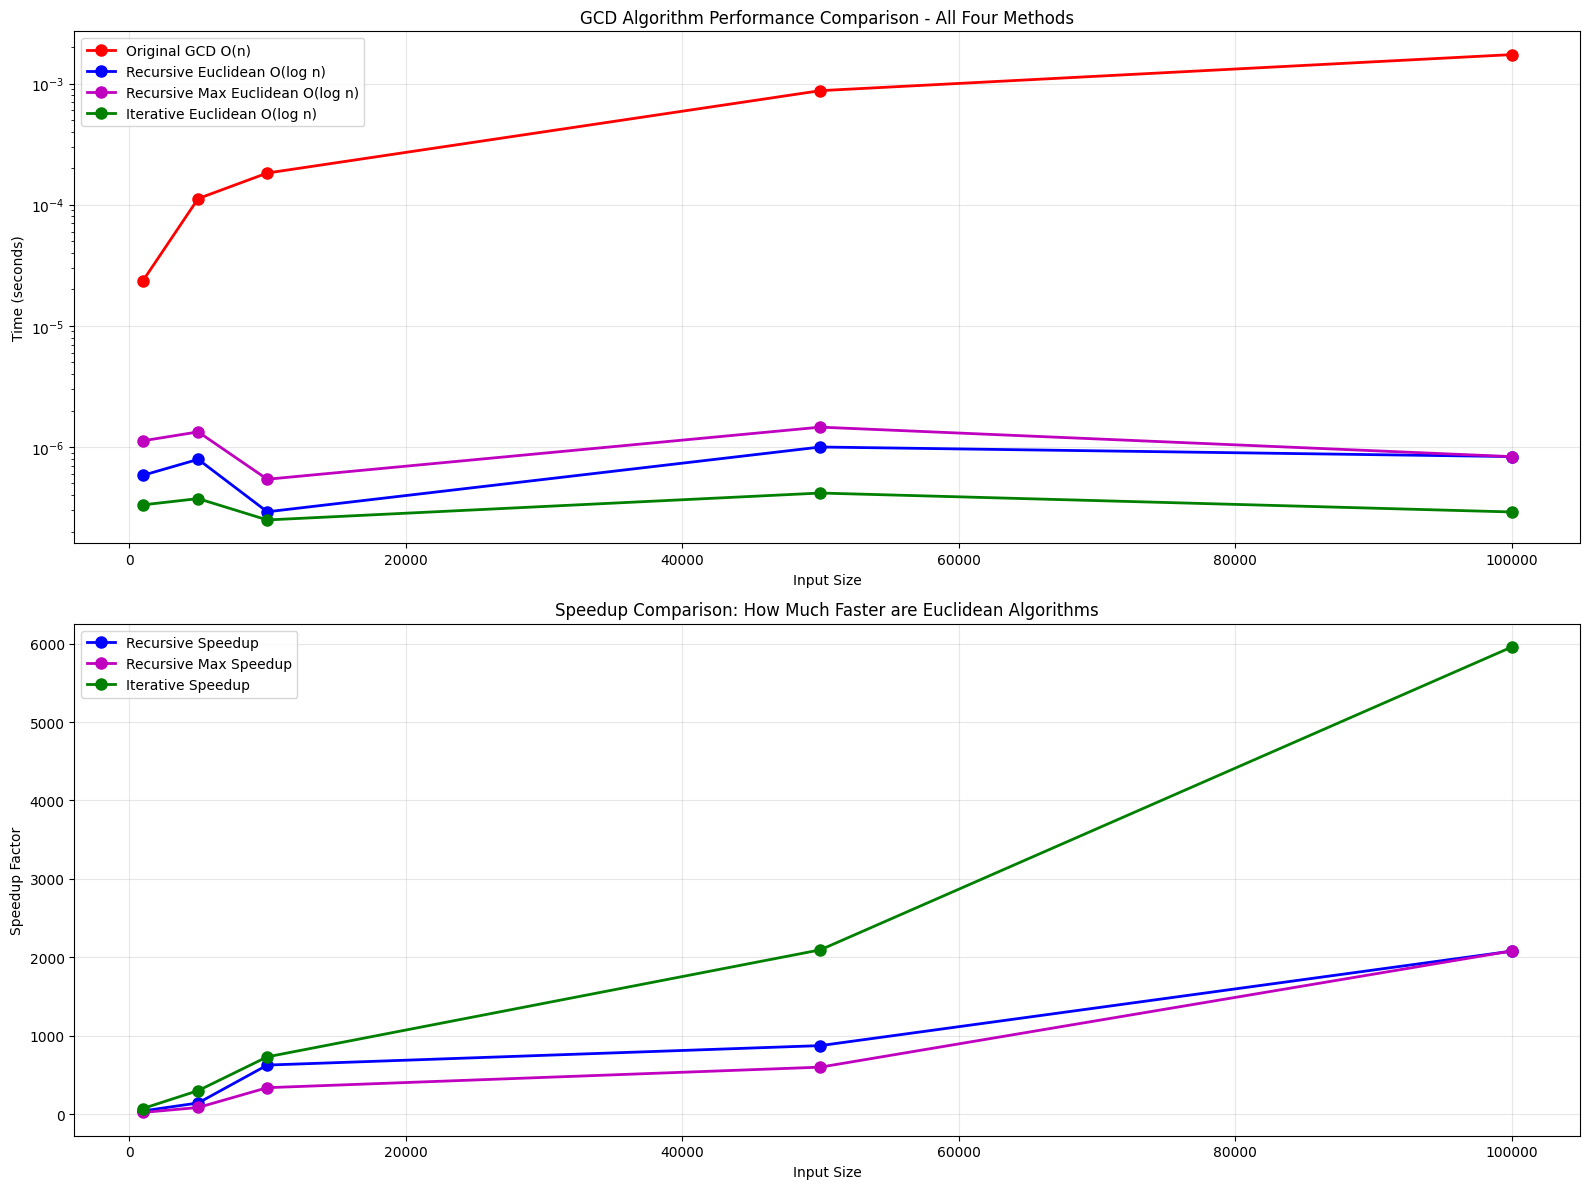


CONCLUSION:
- Original GCD: O(n) - Linear time complexity
- Recursive Euclidean GCD: O(log n) - Logarithmic time complexity
- Recursive Max Euclidean GCD: O(log n) - Logarithmic time complexity with explicit ordering
- Iterative Euclidean GCD: O(log n) - Logarithmic time complexity
- All Euclidean algorithms are dramatically faster for large inputs!
- Maximum speedup with recursive: 2077.9x
- Maximum speedup with recursive max: 2080.4x
- Maximum speedup with iterative: 5955.3x
- Performance differences between Euclidean variants are minimal - all have O(log n) complexity


In [37]:
# Visualize the performance comparison
if PLOTTING_AVAILABLE:
    plt.figure(figsize=(16, 12))

    # Create subplot for timing comparison
    plt.subplot(2, 1, 1)
    plt.plot(sizes, orig_times, 'ro-', label='Original GCD O(n)', linewidth=2, markersize=8)
    plt.plot(sizes, recur_times, 'bo-', label='Recursive Euclidean O(log n)', linewidth=2, markersize=8)
    plt.plot(sizes, recur_max_times, 'mo-', label='Recursive Max Euclidean O(log n)', linewidth=2, markersize=8)
    plt.plot(sizes, iter_times, 'go-', label='Iterative Euclidean O(log n)', linewidth=2, markersize=8)
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('GCD Algorithm Performance Comparison - All Four Methods')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Use log scale to better show the difference

    # Create subplot for speedup comparison
    plt.subplot(2, 1, 2)
    speedup_recursive = [orig/rec if rec > 0 else 0 for orig, rec in zip(orig_times, recur_times)]
    speedup_recursive_max = [orig/rec_max if rec_max > 0 else 0 for orig, rec_max in zip(orig_times, recur_max_times)]
    speedup_iterative = [orig/iter_t if iter_t > 0 else 0 for orig, iter_t in zip(orig_times, iter_times)]
    
    plt.plot(sizes, speedup_recursive, 'bo-', linewidth=2, markersize=8, label='Recursive Speedup')
    plt.plot(sizes, speedup_recursive_max, 'mo-', linewidth=2, markersize=8, label='Recursive Max Speedup')
    plt.plot(sizes, speedup_iterative, 'go-', linewidth=2, markersize=8, label='Iterative Speedup')
    plt.xlabel('Input Size')
    plt.ylabel('Speedup Factor')
    plt.title('Speedup Comparison: How Much Faster are Euclidean Algorithms')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
    max_speedup_rec = max(speedup_recursive)
    max_speedup_rec_max = max(speedup_recursive_max)
    max_speedup_iter = max(speedup_iterative)
else:
    print("PERFORMANCE COMPARISON (text format):")
    print("Size | Original (s) | Recursive (s) | Recursive Max (s) | Iterative (s)")
    print("-----|--------------|---------------|-------------------|-------------")
    speedup_recursive = []
    speedup_recursive_max = []
    speedup_iterative = []
    for i, size in enumerate(sizes):
        speedup_rec = orig_times[i] / recur_times[i] if recur_times[i] > 0 else float('inf')
        speedup_rec_max = orig_times[i] / recur_max_times[i] if recur_max_times[i] > 0 else float('inf')
        speedup_iter = orig_times[i] / iter_times[i] if iter_times[i] > 0 else float('inf')
        speedup_recursive.append(speedup_rec)
        speedup_recursive_max.append(speedup_rec_max)
        speedup_iterative.append(speedup_iter)
        print(f"{size:4d} | {orig_times[i]:10.6f} | {recur_times[i]:11.6f} | {recur_max_times[i]:15.6f} | {iter_times[i]:11.6f}")
    
    max_speedup_rec = max(speedup_recursive)
    max_speedup_rec_max = max(speedup_recursive_max)
    max_speedup_iter = max(speedup_iterative)

print(f"\nCONCLUSION:")
print(f"- Original GCD: O(n) - Linear time complexity")
print(f"- Recursive Euclidean GCD: O(log n) - Logarithmic time complexity") 
print(f"- Recursive Max Euclidean GCD: O(log n) - Logarithmic time complexity with explicit ordering") 
print(f"- Iterative Euclidean GCD: O(log n) - Logarithmic time complexity") 
print(f"- All Euclidean algorithms are dramatically faster for large inputs!")
print(f"- Maximum speedup with recursive: {max_speedup_rec:.1f}x")
print(f"- Maximum speedup with recursive max: {max_speedup_rec_max:.1f}x")
print(f"- Maximum speedup with iterative: {max_speedup_iter:.1f}x")
print(f"- Performance differences between Euclidean variants are minimal - all have O(log n) complexity")

## Detailed Timing Analysis with Timer Class

Let's use the Timer class directly to get more detailed timing information for specific test cases.

In [38]:
def detailed_timing_analysis() -> None:
    """Detailed timing analysis using Timer class directly"""
    print("DETAILED TIMING: Using Timer class for precise measurements")
    print("=" * 65)
    
    # Test cases with different characteristics
    test_cases = [
        (1000, 500, "Small numbers"),
        (50000, 30000, "Medium numbers"),
        (1000000, 600000, "Large numbers"),
        (56781234, 87654321, "Very large numbers (original test)")
    ]
    
    for m, n, description in test_cases:
        print(f"\nTest case: {description}")
        print(f"Numbers: gcd({m}, {n})")
        
        # Time original algorithm with Timer class
        timer1 = Timer()
        timer1.start()
        result1 = gcd(m, n)
        timer1.stop()
        
        # Time recursive Euclidean algorithm with Timer class
        timer2 = Timer()
        timer2.start()
        result2 = gcd_euclid_recursive(m, n)
        timer2.stop()
        
        # Time recursive Euclidean with max/min algorithm with Timer class
        timer3 = Timer()
        timer3.start()
        result3 = gcd_euclid_recursive_max(m, n)
        timer3.stop()
        
        # Time iterative Euclidean algorithm with Timer class
        timer4 = Timer()
        timer4.start()
        result4 = gcd_euclidean(m, n)
        timer4.stop()
        
        print(f"Original GCD result:       {result1}")
        print(f"Original GCD time:         {timer1}")
        print(f"Recursive GCD time:        {timer2}")
        print(f"Recursive Max GCD time:    {timer3}")
        print(f"Iterative GCD time:        {timer4}")
        print(f"Results match: {'YES' if result1 == result2 == result3 == result4 else 'NO'}")
        
        # Calculate speedups
        euclidean_times = [
            ("Recursive", timer2.elapsed()),
            ("Recursive Max", timer3.elapsed()),
            ("Iterative", timer4.elapsed())
        ]
        
        for name, time_val in euclidean_times:
            if time_val > 0:
                speedup = timer1.elapsed() / time_val
                print(f"{name} speedup: {speedup:.1f}x faster than original")

# Run detailed analysis
detailed_timing_analysis()

DETAILED TIMING: Using Timer class for precise measurements

Test case: Small numbers
Numbers: gcd(1000, 500)
Original GCD result:       500
Original GCD time:         0.000010 seconds
Recursive GCD time:        0.000001 seconds
Recursive Max GCD time:    0.000001 seconds
Iterative GCD time:        0.000001 seconds
Results match: YES
Recursive speedup: 15.4x faster than original
Recursive Max speedup: 9.5x faster than original
Iterative speedup: 15.4x faster than original

Test case: Medium numbers
Numbers: gcd(50000, 30000)
Original GCD result:       10000
Original GCD time:         0.000574 seconds
Recursive GCD time:        0.000001 seconds
Recursive Max GCD time:    0.000001 seconds
Iterative GCD time:        0.000001 seconds
Results match: YES
Recursive speedup: 861.5x faster than original
Recursive Max speedup: 382.5x faster than original
Iterative speedup: 765.0x faster than original

Test case: Large numbers
Numbers: gcd(1000000, 600000)
Original GCD result:       200000
Origin

## Context Manager Testing

Let's also demonstrate using the Timer as a context manager for clean, readable timing code.

In [39]:
def context_manager_demo() -> None:
    """Demonstrate Timer context manager for clean timing code"""
    print("CONTEXT MANAGER: Clean timing with 'with' statements")
    print("=" * 55)
    
    m, n = 100000, 75000
    print(f"Computing gcd({m}, {n}) using all four algorithms:\n")
    
    # Using context manager for original GCD
    print("1. Original GCD Algorithm:")
    with Timer() as timer:
        result1 = gcd(m, n)
    print(f"   Result: {result1}")
    print(f"   Time taken: {timer}")
    
    # Using context manager for recursive Euclidean GCD
    print("\n2. Recursive Euclidean GCD Algorithm:")
    with Timer() as timer:
        result2 = gcd_euclid_recursive(m, n)
    print(f"   Result: {result2}")
    print(f"   Time taken: {timer}")
    
    # Using context manager for recursive Euclidean with max/min GCD
    print("\n3. Recursive Max Euclidean GCD Algorithm:")
    with Timer() as timer:
        result3 = gcd_euclid_recursive_max(m, n)
    print(f"   Result: {result3}")
    print(f"   Time taken: {timer}")
    
    # Using context manager for iterative Euclidean GCD
    print("\n4. Iterative Euclidean GCD Algorithm:")
    with Timer() as timer:
        result4 = gcd_euclidean(m, n)
    print(f"   Result: {result4}")
    print(f"   Time taken: {timer}")
    
    print(f"\nVerification: All results match = {result1 == result2 == result3 == result4}")

# Run context manager demo
context_manager_demo()

CONTEXT MANAGER: Clean timing with 'with' statements
Computing gcd(100000, 75000) using all four algorithms:

1. Original GCD Algorithm:
   Result: 25000
   Time taken: 0.001206 seconds

2. Recursive Euclidean GCD Algorithm:
   Result: 25000
   Time taken: 0.000001 seconds

3. Recursive Max Euclidean GCD Algorithm:
   Result: 25000
   Time taken: 0.000002 seconds

4. Iterative Euclidean GCD Algorithm:
   Result: 25000
   Time taken: 0.000001 seconds

Verification: All results match = True


## Summary of Time Complexity Analysis

**Key Findings:**

1. **Original GCD Function**: O(min(m,n)) - Linear time complexity
   - Checks every number from 1 to min(m,n) 
   - Simple but inefficient for large numbers

2. **Recursive Euclidean GCD Algorithm**: O(log(min(m,n))) - Logarithmic time complexity
   - Uses recursion with the mathematical property: gcd(m,n) = gcd(n, m mod n)
   - Elegant implementation but may hit recursion limits for very large numbers
   - Direct parameter passing without explicit ordering

3. **Recursive Max Euclidean GCD Algorithm**: O(log(min(m,n))) - Logarithmic time complexity
   - Uses recursion with explicit max/min parameter ordering
   - Ensures larger number is always the first parameter
   - Slightly more overhead due to max/min calculation but same asymptotic complexity

4. **Iterative Euclidean GCD Algorithm**: O(log(min(m,n))) - Logarithmic time complexity
   - Uses loops with the same mathematical property as recursive versions
   - No recursion limit concerns
   - Typically fastest due to no function call overhead

5. **Performance Comparison**:
   - For small numbers: All algorithms are fast enough
   - For large numbers: All three Euclidean algorithms show significant speedup over original
   - Euclidean variants: Similar performance, minor differences due to implementation details
   - The difference becomes more pronounced as input size increases

6. **Timer Library Usage**:
   - `time_function()` utility for simple function timing
   - Direct Timer class usage for detailed control
   - Context manager (`with Timer()`) for clean, readable code
   - Type hints added for better code documentation and IDE support

**Recommendations**: 
- Use any Euclidean algorithm for production code due to superior O(log n) time complexity
- Prefer iterative version for very large numbers to avoid recursion limits
- All Euclidean versions are dramatically faster than the brute force O(n) approach
- Choose based on readability preference: recursive for elegance, iterative for performance

**Author: Muntasir Raihan Rahman**